# Fastai Image Classification Tips & Tricks

The first few fastai lectures contained a lot of tricks to optimize image classification. The tools they mentioned are:
1. Using the learning rate finder
1. Adding data augmentations
1. Using learning rate annealing
1. Using cycle_mult
1. Unfreezing pretrained layers
1. Predicing with test time augmentation
1. Using more complex architectures
1. Starting with small images, and increasing their size
1. Changing dropout

## The Simple Example

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

assert torch.cuda.is_available() & torch.backends.cudnn.enabled

In [3]:
PATH = 'data/dogscats'
sz = 224

In [4]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms = tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.055585   0.026725   0.989     
    1      0.040134   0.02361    0.9925    



[0.02360953338444233, 0.9925]

## Use Learning Rate Finder

 83%|████████▎ | 299/360 [00:05<00:01, 59.23it/s, loss=0.322]


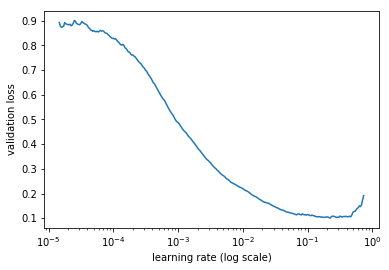

In [5]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.lr_find()
learn.sched.plot()

## Add Data Augmentations

In [6]:
tfms = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)
data = ImageClassifierData.from_paths(PATH, tfms = tfms)
learn = ConvLearner.pretrained(arch, data, precompute = False)

## Use Learning Rate Annealing

In [7]:
learn.fit(0.01, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.050979   0.02791    0.9895    
    1      0.058912   0.025463   0.9905    



[0.025462953478097915, 0.9905]

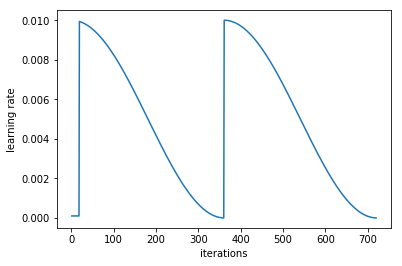

In [8]:
learn.sched.plot_lr()

## Use cycle_mult

epoch      trn_loss   val_loss   accuracy   
    0      0.043152   0.024599   0.9905    
    1      0.045493   0.02805    0.988     
    2      0.046869   0.025255   0.9905    



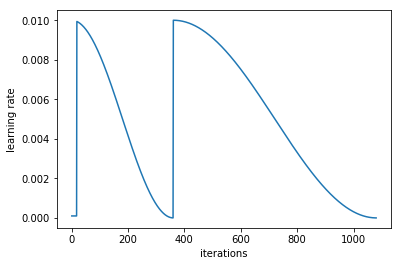

In [9]:
learn.fit(0.01, 2, cycle_len = 1, cycle_mult = 2)
learn.sched.plot_lr()

## Unfreeze Pretrained Layers

In [10]:
learn.unfreeze()

In [11]:
lrs = [1e-4, 1e-3, 1e-2]

In [12]:
learn.fit(lrs, 1, cycle_len = 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.056221   0.026101   0.9905    
    1      0.03948    0.024121   0.991     



[0.02412130534648895, 0.991]

## Predict with Test Time Augmentations

In [27]:
log_probs, y = learn.TTA()
probs = np.mean(np.exp(log_probs),0)

In [28]:
preds = np.argmax(probs, axis = 1)
preds

array([0, 0, 0, ..., 1, 1, 0])

In [29]:
1 - sum(preds != y) / y.size

0.9925

## Use a More Complex Architecture

In [30]:
arch = resnext101_64

## Gradually Increase Image Size

## Change Dropout